**Here we will obtain size scaling and temperature dependence of $r_{m,opt}$ across arthropods using MTE.**

In [2]:
library(tidyverse)

The general MTE equation to fit to the data is:

$$ r_{m,opt} = r_{0,opt} m^{-y}  e^{\frac{-E}{k T_{opt}}} $$

Taking logs of both sides,

$$ \log(r_{m,opt}) = \log(r_{0,opt}) -y \log(m) - \frac{E}{k T_{opt}} $$ 

Let's first plot the data.

In [100]:
r_m_opt_data <- as_tibble(read.csv('../data/dataForTempCorrections.csv')) # load in data 

r_m_opt_data$kT <- 1/ (8.617333262145 * 10^-5 * (r_m_opt_data$T_opt+273.15))

r_m_opt_data

species,T_opt,rm_opt,mass,k,e,E,kT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aedes albopictus,28.15315,0.10701810,2.2000000,8.62e-05,2.718282,0.65,38.51443
Bemisia tabaci,30.40541,0.16601576,0.2931250,8.62e-05,2.718282,0.65,38.22867
Stethorus punctillum,32.34234,0.14467362,0.4800000,8.62e-05,2.718282,0.65,37.98628
Tetranychus mcdanieli,33.01802,0.22763654,0.0245000,8.62e-05,2.718282,0.65,37.90245
Tetranychus urticae,31.44144,0.35186187,0.0245000,8.62e-05,2.718282,0.65,38.09863
Clavigralla tomentosicollis,31.48649,0.14804600,50.4950000,8.62e-05,2.718282,0.65,38.09300
Planococcus citri,26.62162,0.12046314,1.8900000,8.62e-05,2.718282,0.65,38.71120
Muscidifurax zaraptor,31.66667,0.24693709,0.8950000,8.62e-05,2.718282,0.65,38.07048
Rhopalosiphum maidis,28.87387,0.25039073,0.2995714,8.62e-05,2.718282,0.65,38.42252


`geom_smooth()` using formula 'y ~ x'



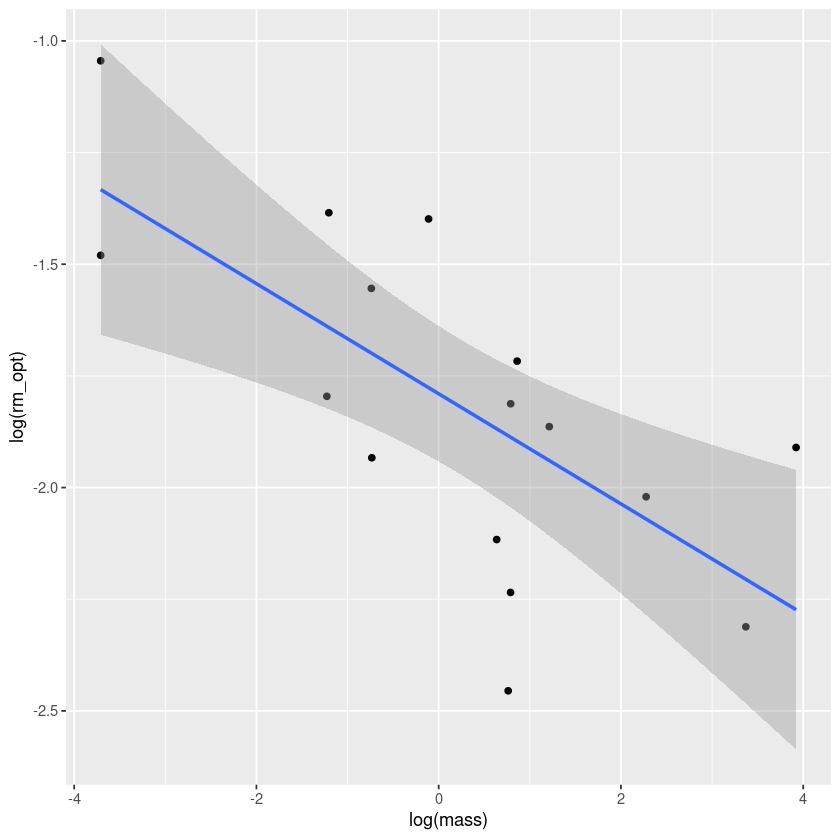

In [67]:
#plot uncorrected data in log-log scale
r_m_opt_data %>%
  ggplot(aes(x=log(mass),y = log(rm_opt)))+
  geom_point()+
  geom_smooth(method = 'lm')

`geom_smooth()` using formula 'y ~ x'



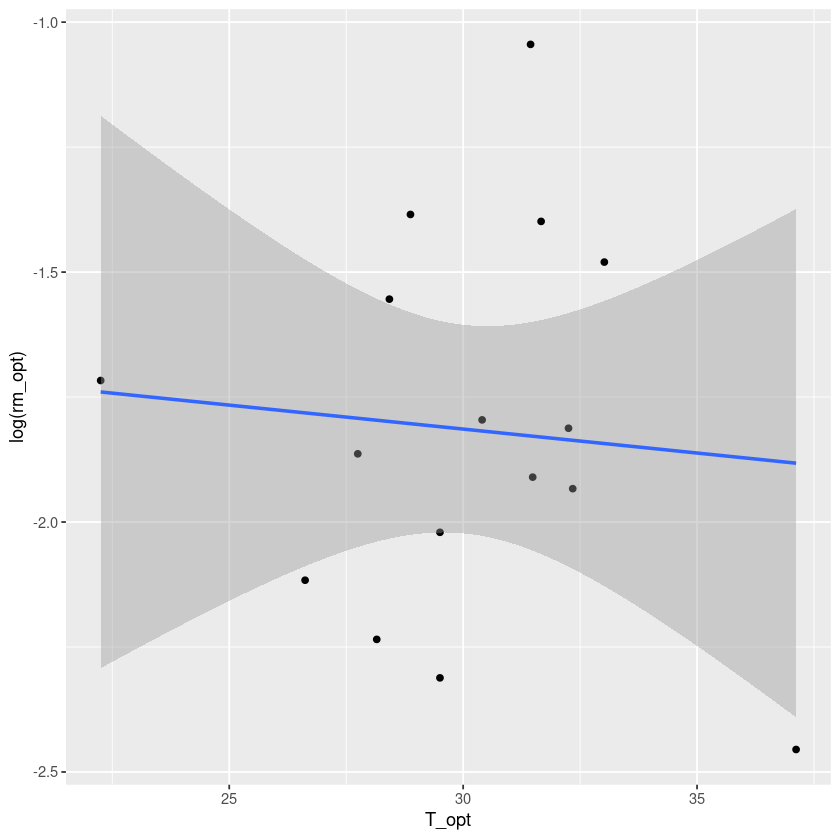

In [142]:
#plot rm_opt by temperature (T_opt)
r_m_opt_data %>%
  ggplot(aes(x = T_opt,y = log(rm_opt))) +
  geom_point()+
  geom_smooth(method = 'lm')

In [154]:
# linear model (note the allometry is linear in log-log scale)
Tc_model <- lm(log(rm_opt) ~ log(mass) + kT, data = r_m_opt_data)
summary(Tc_model)


Call:
lm(formula = log(rm_opt) ~ log(mass) + kT, data = r_m_opt_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39607 -0.16404  0.00719  0.15497  0.42574 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -9.25967    6.76219  -1.369  0.19409   
log(mass)   -0.13039    0.03468  -3.760  0.00238 **
kT           0.19518    0.17669   1.105  0.28932   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2795 on 13 degrees of freedom
Multiple R-squared:  0.5239,	Adjusted R-squared:  0.4507 
F-statistic: 7.153 on 2 and 13 DF,  p-value: 0.008035


In [139]:
coef(Tc_model)

(Intercept)   log(mass)          kT 
 -9.2596747  -0.1303863   0.1951818

In [140]:
confint(Tc_model,level = .95)
anova(Tc_model)

,2.5 %,97.5 %
(Intercept),-23.8685055,5.34915603
log(mass),-0.2053061,-0.05546657
kT,-0.1865249,0.57688854


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,1.02243082,1.02243082,13.085191,0.003126428
kT,1,0.09535177,0.09535177,1.220323,0.289324192
Residuals,13,1.01577429,0.07813648,NA,NA


`geom_smooth()` using formula 'y ~ x'



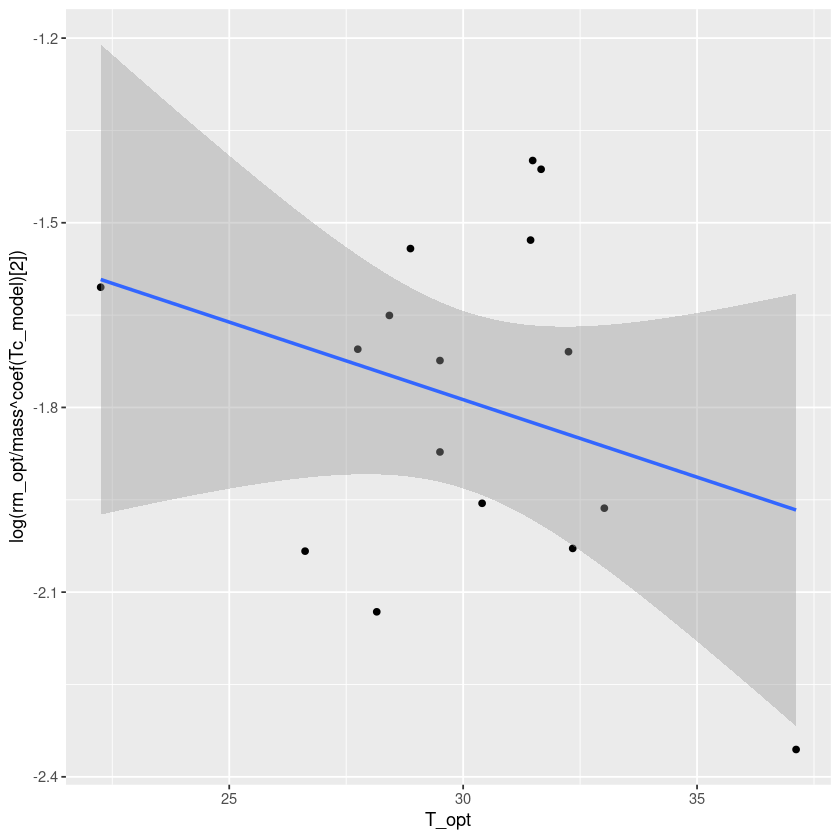

In [143]:
#plot rm_opt vs T, correcting for mass
r_m_opt_data %>%
  ggplot(aes(x = T_opt, y = log(rm_opt/mass^coef(Tc_model)[2]))) +
  geom_point()+
  geom_smooth(method = 'lm')

## Now for the development rate data

In [122]:
a_data <- as_tibble(read.csv('../data/a_pksT_pksMass.csv')) # load in data 
a_data$kT <- 1/(8.617333262145 * 10^-5 * (a_data$T_pk+273.15))
a_data

a_pk,a_pkLwr,a_pkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass,kT
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.11032768,0.09471962,0.13018668,Aedes albopictus,27.806,25.99138,31.12812,2.2000000,38.55885
0.07115992,0.06608679,0.08221159,Bemisia tabaci,30.185,29.71900,30.70700,0.2931250,38.25644
0.15281755,0.14127348,0.16640298,Stethorus punctillum,32.875,32.78418,33.01100,0.4800000,37.92016
0.35107259,0.32240131,0.39555812,Tetranychus mcdanieli,35.182,34.87514,35.67409,0.0245000,37.63644
0.16981269,0.14444745,0.19103654,Tetranychus urticae,31.467,30.02250,33.59829,0.0245000,38.09544
0.13592425,0.11469574,0.14760064,Clavigralla tomentosicollis,33.642,32.52704,34.38167,50.4950000,37.82536
0.05788274,0.05024212,0.06777104,Planococcus citri,26.995,24.87723,27.89998,1.8900000,38.66304
0.08824361,0.07642595,0.10138382,Muscidifurax zaraptor,32.038,31.86001,32.65259,0.8950000,38.02416
0.19593237,0.18744060,0.20257857,Rhopalosiphum maidis,27.926,27.43207,28.59200,0.2995714,38.54348


`geom_smooth()` using formula 'y ~ x'



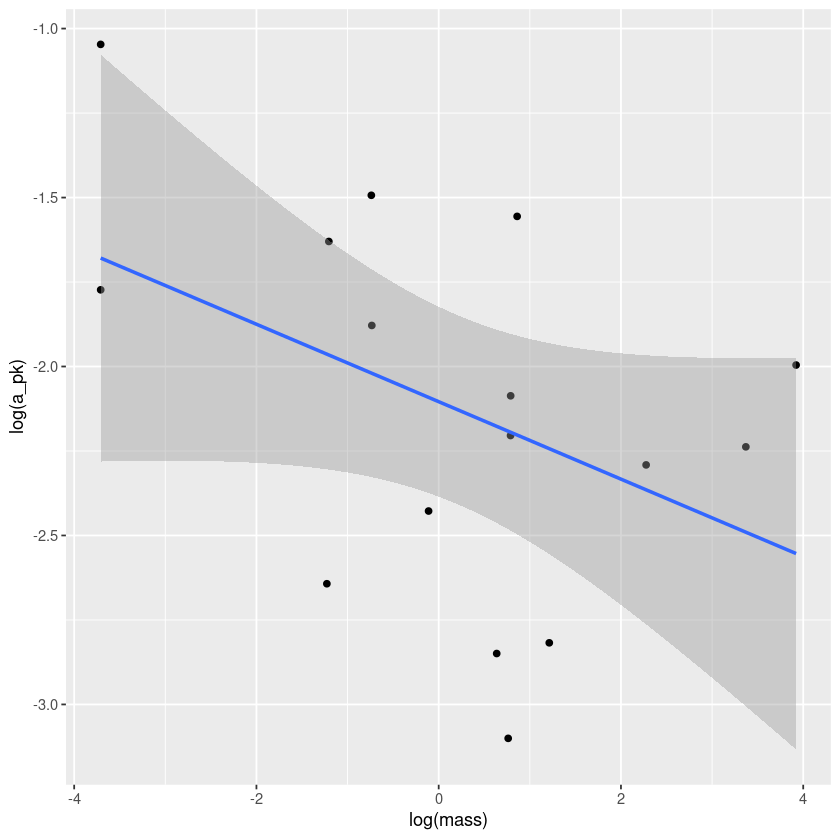

In [145]:
#plot uncorrected data in log-log scale
a_data %>%
  ggplot(aes(x=log(mass), y = log(a_pk)))+
  geom_point()+
  geom_smooth(method = 'lm')

`geom_smooth()` using formula 'y ~ x'



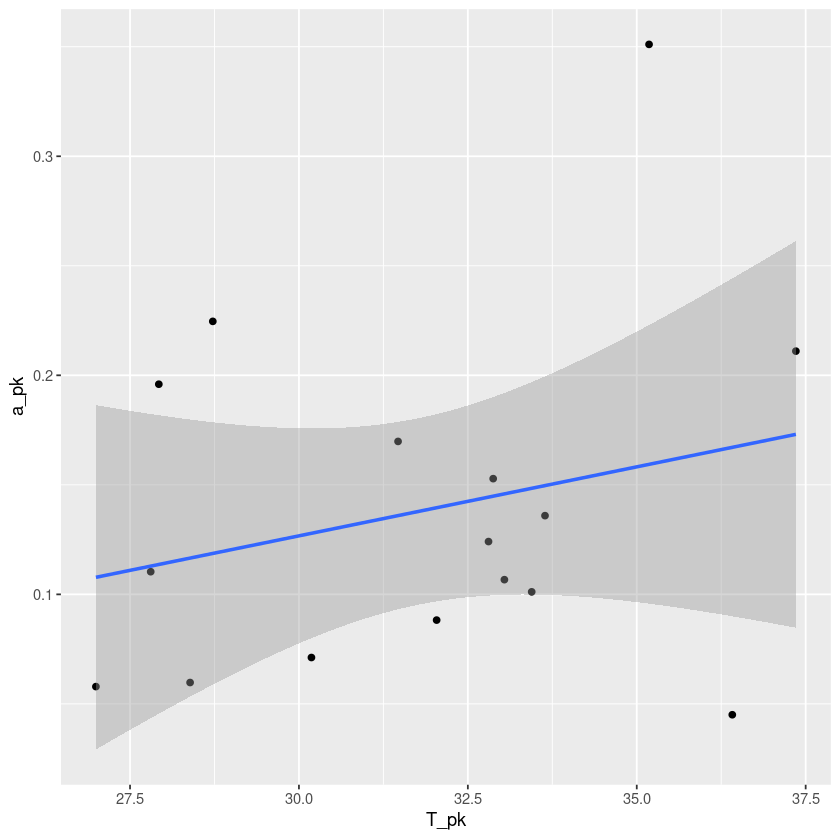

In [146]:
#plot a_pk vs T
a_data %>%
  ggplot(aes(x = T_pk, y = a_pk)) +
  geom_point()+
  geom_smooth(method = 'lm')

In [148]:
# linear model (note the allometry is linear in log-log scale)
a_model <- lm(log(a_pk) ~ log(mass) + kT, data = a_data)
summary(a_model) 


Call:
lm(formula = log(a_pk) ~ log(mass) + kT, data = a_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.10933 -0.36811  0.07469  0.41846  0.65446 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 11.43157   12.97825   0.881   0.3944  
log(mass)   -0.12170    0.06377  -1.908   0.0787 .
kT          -0.35559    0.34093  -1.043   0.3160  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5202 on 13 degrees of freedom
Multiple R-squared:  0.2509,	Adjusted R-squared:  0.1357 
F-statistic: 2.177 on 2 and 13 DF,  p-value: 0.1529


In [149]:
coef(a_model)

(Intercept)   log(mass)          kT 
 11.4315691  -0.1216951  -0.3555876

In [150]:
confint(a_model,level = .95)
anova(Tc_model)

,2.5 %,97.5 %
(Intercept),-16.6062342,39.46937238
log(mass),-0.2594599,0.01606969
kT,-1.0921146,0.38093935


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,1.02243082,1.02243082,13.085191,0.003126428
kT,1,0.09535177,0.09535177,1.220323,0.289324192
Residuals,13,1.01577429,0.07813648,NA,NA


`geom_smooth()` using formula 'y ~ x'



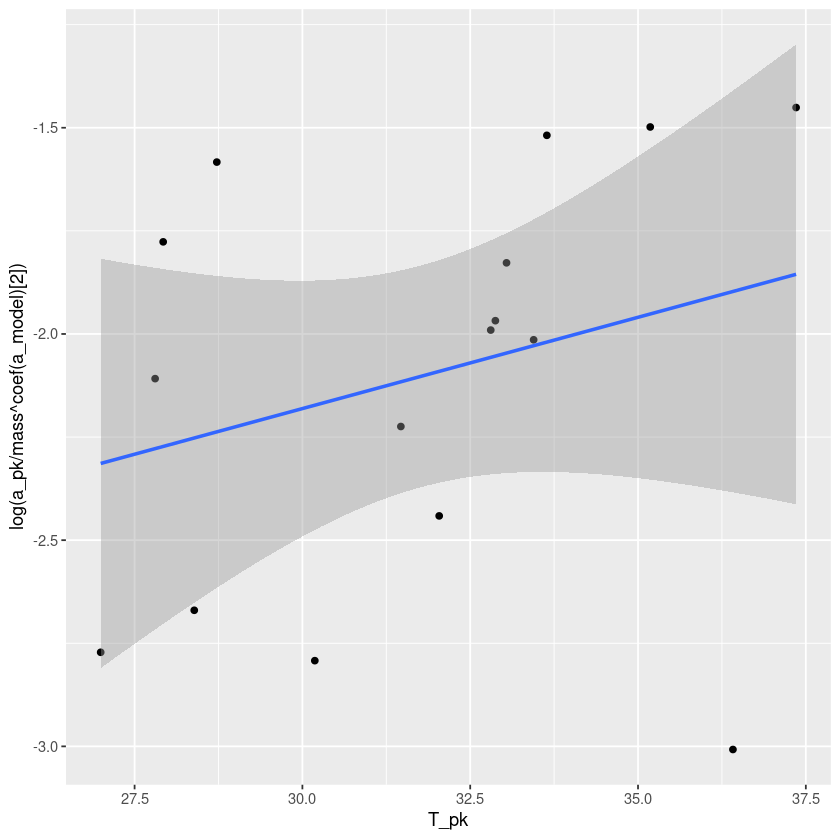

In [152]:
#plot rm_opt in 1/kT, correcting for mass
a_data %>%
  ggplot(aes(x = T_pk, y = log(a_pk/mass^coef(a_model)[2]))) +
  geom_point()+
  geom_smooth(method = 'lm')